In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rc('font', size=18)

In [14]:
phones = pd.read_csv('/Users/vyacheslavzulanov/JupyterNotebook/Skillbox/1/1/1.8_phones.csv')
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


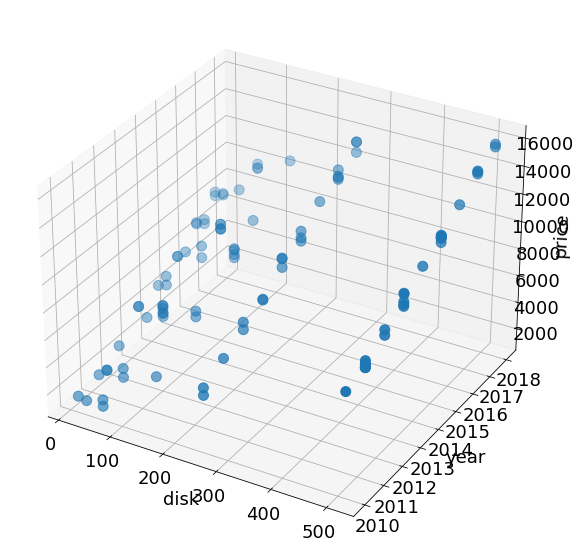

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(phones['disk'],phones['year'], phones['price'], s=100)

ax.set_xlabel('disk')
ax.set_ylabel('year')
ax.set_zlabel('price')

plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = phones[['disk', 'year']]
y = phones['price']

reg = LinearRegression().fit(X, y)

In [18]:
[b1, b2] = reg.coef_ 
a = reg.intercept_

In [19]:
def reg_prediction (disk, year):
    return a + b1 * disk + b2 * year

In [20]:
reg_prediction(X.disk[0], X.year[0])

7848.046694419114

In [21]:
reg.predict(X[0:1])[0]

7848.046694419114

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [23]:
X = phones[['disk', 'price', 'year']]
y = phones['os']

cl = DecisionTreeClassifier().fit(X, y)

In [24]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [25]:
cl.predict(X[1:2])[0], y[1]

('Android', 'Android')

In [41]:
phones.head(20)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


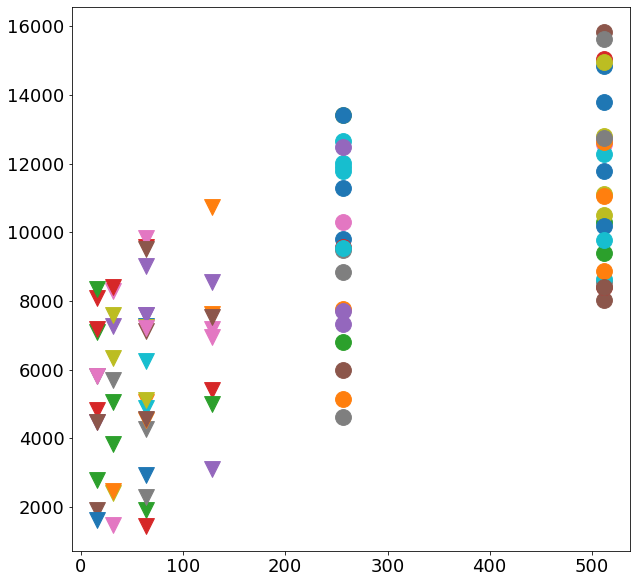

In [33]:
fig = plt.figure(figsize=(10, 10))

markers = {'iOS':'o', 'Android':'v'}

for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
plt.show()

In [34]:
from sklearn.cluster import KMeans

In [36]:
X = phones[['disk', 'price']]

clust = KMeans(n_clusters=2).fit(X)

In [37]:
[c1, c2] = clust.cluster_centers_

In [38]:
clust.cluster_centers_

array([[  116.8       ,  5784.78333333],
       [  368.        , 11601.65      ]])

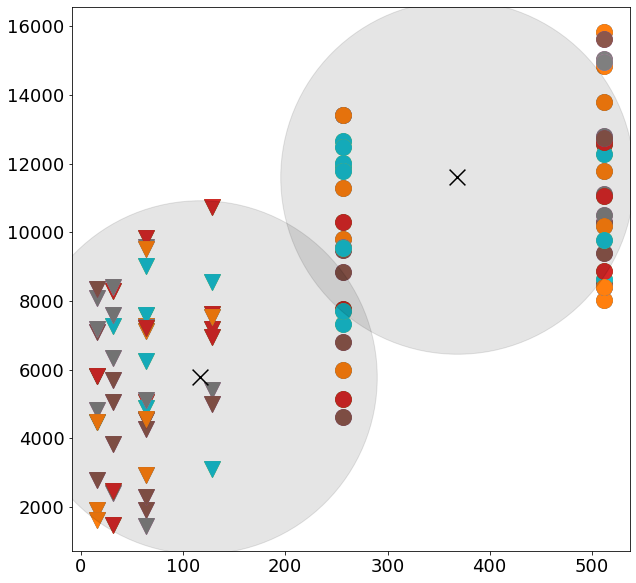

In [39]:
fig = plt.figure(figsize=(10, 10))

markers = {'iOS':'o', 'Android':'v'}

for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
    
plt.scatter(c1[0], c1[1], s=250, marker='x', c='black')
plt.scatter(c1[0], c1[1], s=250 * 5e2, c='black', alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker='x', c='black')
plt.scatter(c2[0], c2[1], s=250 * 5e2, c='black', alpha=0.1)

    
plt.show()